## Kuantum Teleportasyon

In [1]:
import cirq
import numpy

In [2]:
# Devreyi ilkler.
my_circuit = cirq.Circuit()

# 2 boyutta 2 adet qubit oluşturur.
qubits = cirq.LineQubit.range(2)

# 2'den farklı boyutta şöyle kullanılabilir.
# Örnek 4.boyuttan 2 adet kudit.
qudits = cirq.LineQid.range(2, dimension=4)

print("List of qubits in circuit: ", qubits)

List of qubits in circuit:  [cirq.LineQubit(0), cirq.LineQubit(1)]


In [3]:
# Hadamard ilk kubite uygulanır.
my_circuit.append(cirq.H(qubits[0]))

# CNOT ilk ve ikinci kubite uygulanır. (İlk kubit kaynak, ikinci kubit hedef)
my_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
my_circuit.append(cirq.measure(qubits[0], qubits[1]))

In [4]:
print(my_circuit)

0: ───H───@───M───
          │   │
1: ───────X───M───


In [5]:
# Repetitions kullanarak bir devre için örnekleme elde edebiliyoruz.
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions=1024)

In [6]:
print(type(results.measurements))

<class 'dict'>


In [7]:
print(results.measurements.keys())

dict_keys(['0,1'])


In [8]:
print("Toplam ölçüm sayısı: ", len(results.measurements['0,1']))
print("Ölçümler: ")
print(results.measurements['0,1'])

Toplam ölçüm sayısı:  1024
Ölçümler: 
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [9]:
# Tekrardan devreyi kuralım.
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(qubits[0]))
my_circuit.append(cirq.CNOT(qubits[0], qubits[1]))

# Bu adımda anahtar kelime verelim.
my_circuit.append(cirq.measure(qubits[0], qubits[1], key='R'))

sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions=1024)
print(results.measurements.keys())

dict_keys(['R'])


In [10]:
# Tekrardan devreyi kuralım.
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(qubits[0]))
my_circuit.append(cirq.CNOT(qubits[0], qubits[1]))

# Bu adımda ölçümleri ayıralım.
my_circuit.append(cirq.measure(qubits[0], key='Kubit_0'))
my_circuit.append(cirq.measure(qubits[1], key='Kubit_1'))


sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions=1024)
print("Ölçüm sonucundaki ahantar kelimeler: ", results.measurements.keys())

Ölçüm sonucundaki ahantar kelimeler:  dict_keys(['Kubit_0', 'Kubit_1'])


In [11]:
# Yukarıdan gelen anahtar kelimeler.
print("İlk kubit: \n", results.measurements["Kubit_0"])
print("İkinci kubit: \n", results.measurements["Kubit_1"])

İlk kubit: 
 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
İkinci kubit: 
 [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [12]:
hist = dict()

# Sonuçlar için bir sözlük. 2 kubit = 4 farklı olası durum.
hist["00"] = 0
hist["01"] = 0
hist["10"] = 0
hist["11"] = 0

# Repetition kadar.
for i in range(len(results.measurements["Kubit_0"])):
    k1 = results.measurements["Kubit_0"][i]
    k2 = results.measurements["Kubit_1"][i]
    
    if k1 == k2 == 0:
        hist["00"] += 1
    elif k1 == k2 == 1:
        hist["11"] += 1
    elif k1 != k2 and k1 == 0:
        hist["01"] +=1
    else:
        hist["10"] += 1
        
print(hist)

{'00': 525, '01': 0, '10': 0, '11': 499}


In [13]:
# Tekrardan devreyi kuralım.
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(qubits[0]))
my_circuit.append(cirq.CNOT(qubits[0], qubits[1]))

my_circuit.append(cirq.measure(qubits[0], qubits[1], key='R'))

sim = cirq.Simulator()
results_2 = sim.run(my_circuit, repetitions=1024)
print(results_2.histogram(key='R'))

Counter({0: 517, 3: 507})


In [14]:
from matplotlib import pyplot

{'00': 0.5126953125, '01': 0.0, '10': 0.0, '11': 0.4873046875}


Text(0, 0.5, 'Olasılık (%)')

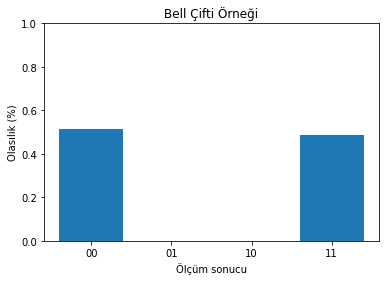

In [15]:
for key in hist:
    hist[key] /= 1024

print(hist)
pyplot.bar(hist.keys(), hist.values())
pyplot.ylim(0, 1.0)
pyplot.title("Bell Çifti Örneği")
pyplot.xlabel("Ölçüm sonucu")
pyplot.ylabel("Olasılık (%)")